In [1]:
from glob import glob
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
#matplotlib notebook
plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rcParams['text.usetex'] = False
#plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
import seaborn as sns

In [5]:
palette=sns.color_palette(as_cmap=1)

In [3]:
means=glob('//smb.uni-oldenburg.de/hpc_data/thesis/data/out/wind-20220614-184509/ensemble_mean*.npy')

In [4]:
varis=glob('//smb.uni-oldenburg.de/hpc_data/thesis/data/out/wind-20220614-184509/ensemble_var*.npy')

In [26]:
means

['//smb.uni-oldenburg.de/hpc_data/thesis/data/out/wind-20220614-184509\\ensemble_mean_7.npy',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/out/wind-20220614-184509\\ensemble_mean_0.npy',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/out/wind-20220614-184509\\ensemble_mean_6.npy',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/out/wind-20220614-184509\\ensemble_mean_2.npy',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/out/wind-20220614-184509\\ensemble_mean_1.npy',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/out/wind-20220614-184509\\ensemble_mean_5.npy',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/out/wind-20220614-184509\\ensemble_mean_3.npy',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/out/wind-20220614-184509\\ensemble_mean_4.npy']

In [6]:
def get_ensemble(p0='//smb.uni-oldenburg.de/hpc_data/thesis/data/out',model='wind-20220614-184509',dom=""):
    p0="/".join([p0,model])
    mean=np.load(p0+"/ensemble_mean{0}_{1}.npy".format(dom,0))[np.newaxis,:,:,:]
    var=np.load(p0+"/ensemble_var{0}_{1}.npy".format(dom,0))[np.newaxis,:,:,:]
    for i in range(1,8):
        dat=np.load(p0+"/ensemble_mean{0}_{1}.npy".format(dom,i))[np.newaxis,:,:,:]
        mean=np.concatenate([mean,dat],axis=0)
        dat=np.load(p0+"/ensemble_var{0}_{1}.npy".format(dom,i))[np.newaxis,:,:,:]
        var=np.concatenate([var,dat],axis=0)
    return mean,var



In [7]:
mean_CE,var_CE=get_ensemble()
#vr=np.load('//smb.uni-oldenburg.de/hpc_data/thesis/data/out/wind-20220614-184509\\ensemble_var_7.npy')

In [8]:
mean2_CE,var2_CE=get_ensemble(model='wind-20220618-010116',dom="CE")

In [7]:
def plot_uv(mean,var,size=[10,6]):
    fig, ax = plt.subplots(2, 2,figsize=size,gridspec_kw = {'wspace':0.05, 'hspace':0.05, "top":0.95,"bottom":0.02})
    

    dat=mean
    vmin0 vmax0 = np.percentile(dat[:,:,0],1), np.percentile(dat[:,:,0],99)
    vmin1 vmax1 = np.percentile(dat[:,:,1],1), np.percentile(dat[:,:,1],99)

    ax_=ax[0,0]
    im0=ax_.imshow(dat[:, :, 0], vmin=vmin0, vmax=vmax0, cmap='viridis', origin='lower')
    ax_.set_title(key, fontsize=12)
    ax_.set_ylabel('u', fontsize=18)
    ax_.set_xticks([], [])
    ax_.set_yticks([], [])


    ax_=ax[1,0]
    im1=ax_.imshow(dat[:, :, 1], vmin=vmin1, vmax=vmax1, cmap='viridis', origin='lower')
    ax_.set_xticks([], [])
    ax_.set_yticks([], [])
    ax_.set_ylabel('v', fontsize=18)
    
    


    fig.subplots_adjust(right=0.95)
    cbar_ax0 = fig.add_axes([0.96, 0.52, 0.03, 0.4])
    fig.colorbar(im0, cax=cbar_ax0)
    cbar_ax0.set_label('m/s')
    cbar_ax1 = fig.add_axes([0.96, 0.05, 0.03, 0.4])
    fig.colorbar(im1, cax=cbar_ax1)
    #plt.savefig(path+'_HRvsSRimg{0:05d}.png'.format(i), dpi=200, bbox_inches='tight')
    #plt.close()

SyntaxError: invalid syntax (<ipython-input-7-705ff5c69865>, line 6)

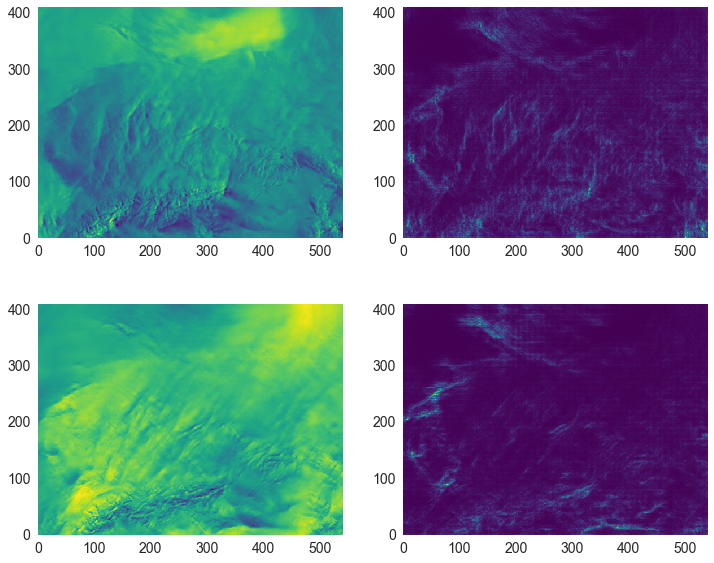

In [102]:
plt.figure(figsize=[12,10])
plt.subplot(2,2,1)
plt.grid()
plt.imshow(mean_CE[-1,:,:,0],cmap='viridis', origin='lower')
plt.subplot(2,2,2)
plt.imshow(var_CE[-1,:,:,0],cmap='viridis', origin='lower')
plt.grid()

plt.subplot(2,2,3)
plt.imshow(mean_CE[-1,:,:,1],cmap='viridis', origin='lower')
plt.grid()
plt.subplot(2,2,4)
plt.imshow(var_CE[-1,:,:,1],cmap='viridis', origin='lower')
plt.grid()

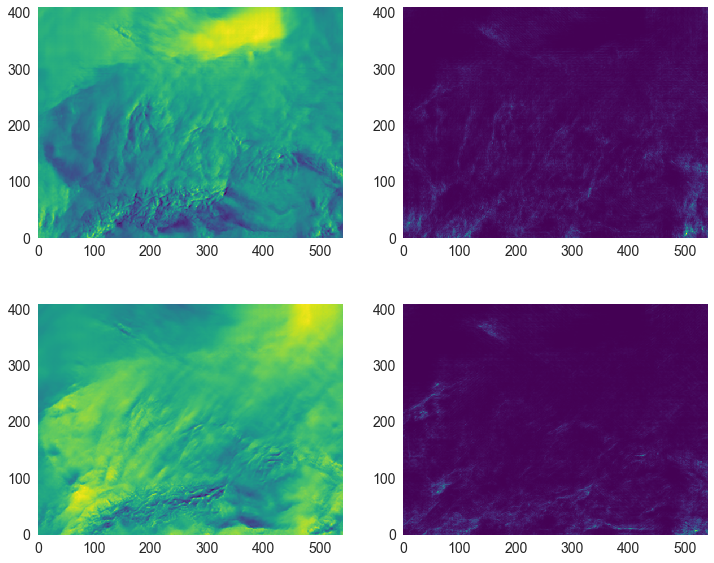

In [116]:
plt.figure(figsize=[12,10])
plt.subplot(2,2,1)
plt.grid()
plt.imshow(mean2_CE[-1,:,:,0],cmap='viridis', origin='lower')
plt.subplot(2,2,2)
plt.imshow(var2_CE[-1,:,:,0],cmap='viridis', origin='lower')
plt.grid()

plt.subplot(2,2,3)
plt.imshow(mean2_CE[-1,:,:,1],cmap='viridis', origin='lower')
plt.grid()
plt.subplot(2,2,4)
plt.imshow(var2_CE[-1,:,:,1],cmap='viridis', origin='lower')
plt.grid()

In [9]:
dom="CE"
p0="//smb.uni-oldenburg.de/hpc_data/thesis/data"
file="P-CE-2006-2007-01-01_dataSR.npy"
target_file="/".join([p0,"test",dom,"final",file[10:14],file.replace("_dataSR","")])
target_CE=np.load(target_file)

In [10]:
model='wind-20220603-122238'
data_CE=np.load("/".join([p0,"out",model,file]))

In [11]:
model='wind-20220602-122733'
data2_CE=np.load("/".join([p0,"out",model,file]))

In [12]:
import pandas as pd

In [229]:
CE_MSE=pd.DataFrame({"WGAN":np.mean(np.linalg.norm(target_CE-data2_CE,axis=-1)**2,axis=(1,2)),
                     "SWGAN":np.mean(np.linalg.norm(target_CE-mean2_CE,axis=-1)**2,axis=(1,2)),
                     "WGAN - HR static":np.mean(np.linalg.norm(target_CE-data_CE,axis=-1)**2,axis=(1,2))[-1],
                     "SWGAN - HR static":np.mean(np.linalg.norm(target_CE-mean_CE,axis=-1)**2,axis=(1,2))[-1]              
             }).iloc[-1]
GB_MSE=pd.DataFrame({"WGAN":np.mean(np.linalg.norm(target_GB-data2_GB,axis=-1)**2,axis=(1,2)),
                     "SWGAN":np.mean(np.linalg.norm(target_GB-mean2_GB,axis=-1)**2,axis=(1,2)),
                     "WGAN - HR static":np.mean(np.linalg.norm(target_GB-data_GB,axis=-1)**2,axis=(1,2))[-1],
                     "SWGAN - HR static":np.mean(np.linalg.norm(target_GB-mean_GB,axis=-1)**2,axis=(1,2))[-1]             
             }).iloc[-1]

In [239]:
tab=pd.concat([CE_MSE,GB_MSE],axis=1)

In [240]:
def df2latex(df,Nd=3):
    print(df.to_latex(float_format="%0.{}f".format(Nd)))

In [243]:
df2latex(tab.diff()/tab*100,1)

\begin{tabular}{lrr}
\toprule
{} &     7 &     7 \\
\midrule
WGAN              &   NaN &   NaN \\
SWGAN             &  -9.0 & -19.6 \\
WGAN - HR static  & -19.5 &   9.1 \\
SWGAN - HR static &  -6.3 & -14.7 \\
\bottomrule
\end{tabular}



In [242]:
df2latex(tab,2)

\begin{tabular}{lrr}
\toprule
{} &    7 &    7 \\
\midrule
WGAN              & 4.15 & 2.84 \\
SWGAN             & 3.81 & 2.38 \\
WGAN - HR static  & 3.19 & 2.61 \\
SWGAN - HR static & 3.00 & 2.28 \\
\bottomrule
\end{tabular}



In [207]:
np.mean(np.linalg.norm(target_CE-data_CE,axis=-1)**2,axis=(1,2))

array([2.20931681, 2.4718168 , 2.72981406, 2.56883958, 2.3301792 ,
       2.65803188, 2.90316634, 3.19135311])

In [208]:
np.mean(np.linalg.norm(target_CE-mean_CE,axis=-1)**2,axis=(1,2))

array([2.01941267, 2.30779137, 2.54600681, 2.41273195, 2.11910551,
       2.47367208, 2.68745789, 3.00242195])

In [219]:
(np.mean(np.linalg.norm(target_CE-mean2_CE,axis=-1)**2,axis=(1,2))-np.mean(np.linalg.norm(target_CE-data2_CE,axis=-1)**2,axis=(1,2)))/np.mean(np.linalg.norm(target_CE-data2_CE,axis=-1)**2,axis=(1,2))*100

array([ -1.1908262 ,  -5.94096981,  -4.68604092,  -7.4871269 ,
       -10.77838673,  -7.4886077 ,  -6.76490799,  -8.22464221])

In [213]:
np.mean(np.linalg.norm(target_CE-mean2_CE,axis=-1)**2,axis=(1,2))

array([2.98673492, 3.39263155, 3.70510911, 3.44907178, 2.87052832,
       3.17934363, 3.55767411, 3.81244662])

### GB

In [34]:
mean_GB,var_GB=get_ensemble(dom="GB")

In [120]:
mean2_GB,var2_GB=get_ensemble(dom="GB",model='wind-20220618-010116')

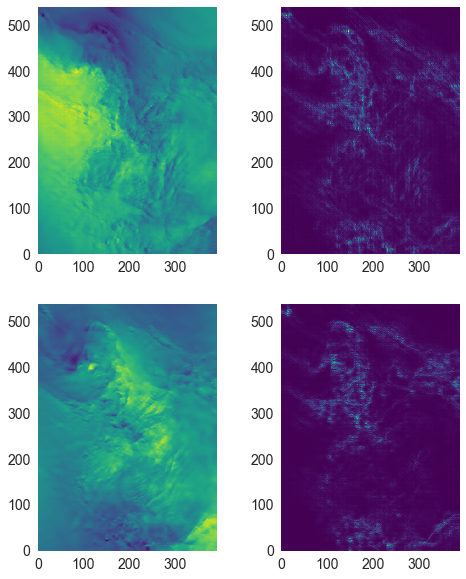

In [105]:
plt.figure(figsize=[8,10])
plt.subplot(2,2,1)
plt.grid()
plt.imshow(mean_GB[-1,:,:,0],cmap='viridis', origin='lower')
plt.subplot(2,2,2)
plt.imshow(var_GB[-1,:,:,0],cmap='viridis', origin='lower')
plt.grid()

plt.subplot(2,2,3)
plt.imshow(mean_GB[-1,:,:,1],cmap='viridis', origin='lower')
plt.grid()
plt.subplot(2,2,4)
plt.imshow(var_GB[-1,:,:,1],cmap='viridis', origin='lower')
plt.grid()

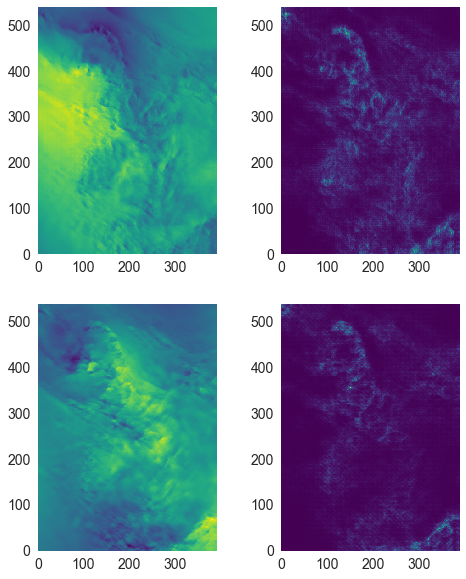

In [121]:
plt.figure(figsize=[8,10])
plt.subplot(2,2,1)
plt.grid()
plt.imshow(mean2_GB[-1,:,:,0],cmap='viridis', origin='lower')
plt.subplot(2,2,2)
plt.imshow(var2_GB[-1,:,:,0],cmap='viridis', origin='lower')
plt.grid()

plt.subplot(2,2,3)
plt.imshow(mean2_GB[-1,:,:,1],cmap='viridis', origin='lower')
plt.grid()
plt.subplot(2,2,4)
plt.imshow(var2_GB[-1,:,:,1],cmap='viridis', origin='lower')
plt.grid()

In [124]:
dom="GB"
p0="//smb.uni-oldenburg.de/hpc_data/thesis/data"
file="P-GB-2006-2007-01-01_dataSR.npy"


In [ ]:
target_file="/".join([p0,"test",dom,"final",file[10:14],file.replace("_dataSR","")])
target_GB=np.load(target_file)

In [ ]:
model='wind-20220603-122238'
data_GB=np.load("/".join([p0,"out",model,file]))

In [127]:
model='wind-20220602-122733'
data2_GB=np.load("/".join([p0,"out",model,file]))

In [36]:
np.mean(np.linalg.norm(target_GB-data_GB,axis=-1)**2,axis=(1,2))

array([2.70522834, 2.4331812 , 3.10940499, 3.9717764 , 3.63876137,
       3.42666491, 3.21249766, 2.61269476])

In [38]:
np.mean(np.linalg.norm(target_GB-mean_GB,axis=-1)**2,axis=(1,2))

array([2.30918367, 1.99470015, 2.58961611, 3.38977521, 3.09783139,
       2.7236416 , 2.64339547, 2.27822614])

In [128]:
np.mean(np.linalg.norm(target_GB-data2_GB,axis=-1)**2,axis=(1,2))

array([2.86566661, 2.47542944, 3.14083952, 3.94278352, 3.67455476,
       3.28348175, 3.15378975, 2.84171542])

In [129]:
np.mean(np.linalg.norm(target_GB-mean2_GB,axis=-1)**2,axis=(1,2))

array([2.25004977, 2.05026922, 2.68143511, 3.40510783, 3.02654682,
       2.8686186 , 2.73322075, 2.37586663])

###  spec

In [144]:
def get_plot_data(target,d,dx=3000):
    spec={}
    (H0,W0,C)=np.shape(target)
    labs=d.keys()
    for key in list(labs)+["Target"]:
        if key =="Target":
            data=target
        else:
            data=d[key]
            
        norm=np.linalg.norm(data,axis=-1)
        fft=np.fft.fft2(norm,axes=(0,1))
        x2=np.abs(fft)**2
        (H,W)=np.shape(x2)
        
        # create array of radii
        #image=np.mean(x2[:,1:int(H/2+1),1:int(W/2+1)],axis=0)
        #image=x2[idx,1:int(H/2+1),1:int(W/2+1)]
        
        spec[key+"_spec"]=x2[1:int(H/2+1),1:int(W/2+1)]
    return spec

def get_radial_avg(image,dx=3000,num2=50):
    H,W=image.shape
    W*=2
    H*=2
    x,y = np.meshgrid(np.arange(1,W/2+1),np.arange(1,H/2+1))
    R = np.sqrt(x**2+y**2)

    f= lambda i : image[(R >= r[i-1]) & (R < r[i+1])].mean()
    f2= lambda i : np.sum(image[(R >= r[i-1]) & (R < r[i+1])].shape)

    r = np.logspace(0,np.log10(np.max(R)),num2)

    mean=np.vectorize(f)(np.arange(0,num2-1))
    n=np.vectorize(f2)(np.arange(0,num2-1))
    cond=n>1
    mean=mean[np.where(cond)]

    r=r[:-1]+np.diff(r)/2
    r=r[np.where(cond)]

    scaling=dx/(W*H)/2/np.pi
    
#     spec[labs[i]+"_k"]=2*np.pi*(r)/dx
#     spec[labs[i]+"_spec"]=mean*scaling
#     spec[labs[i]+"_r"]=r
#     spec[labs[i]+"_n"]=n
    mean*=scaling
    k=2*np.pi/dx/np.flip(r)
    return mean,k,r,n
        
def plot_psds(spec,savefig=0,gt_scaling=10**4*0.2,xlim=None,ylim=None,num=50,size=[12,6],colors=palette):        

    plt.figure(figsize=size)
    for i,lab in enumerate(spec.keys()):
        plot_spec,k,r,n=get_radial_avg(spec[lab],num2=num)
        #k=np.append(k[1:],2*np.pi/3000)
        if lab=="Target_spec":
            plt.plot(k,plot_spec,"r",label="Target")
        else:
            plt.plot(k,plot_spec,label=lab[:-5],color=colors[i])
    plt.plot(k,k**(-5/3)*gt_scaling,"--k",label=r"$-5/3$")
    #plt.plot(k,k**(-5/3)*10**10*0.2,"--k",label="5/3")
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel(r"$k$ [m$^{-1}$]")
    plt.ylabel(r"PSD [m$^3$/s$^2$]")
    plt.legend(frameon=True)
    if ylim is not None:
        plt.ylim(ylim)
    else:
        plt.ylim(1e1)
    
    if xlim is not None:
        plt.xlim(xlim)
    
    if savefig:
        plt.savefig('spec_ens.png', dpi=200, bbox_inches='tight')
    return 

In [215]:
d={"WGAN - HR static":data_CE[-1],
  "SWGAN - HR static":mean_CE[-1],
  "WGAN":data2_CE[-1],
  "SWGAN":mean2_CE[-1]}
plot_spec=get_plot_data(target_CE[-1],d)

C:\Users\Notandi\Anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice.
C:\Users\Notandi\Anaconda3\envs\tf_env\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Notandi\Anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice.
C:\Users\Notandi\Anaconda3\envs\tf_env\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Notandi\Anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice.
C:\Users\Notandi\Anaconda3\envs\tf_env\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Notandi\Anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning

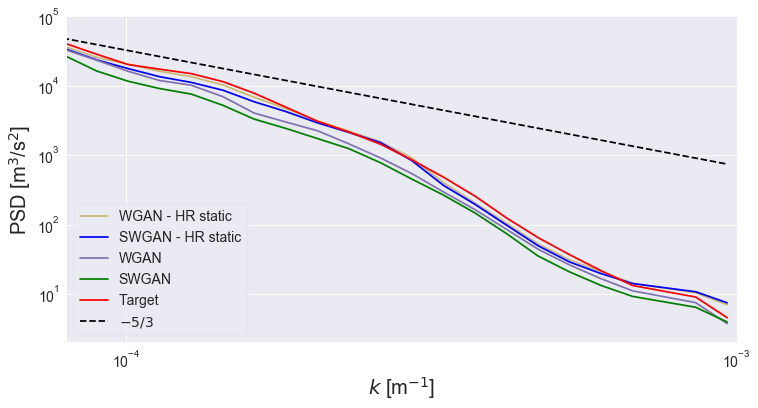

In [216]:
plot_psds(plot_spec,savefig=1,num=50,size=[12,6],gt_scaling=7e-3,ylim=(2e0,1e5),xlim=(8e-5,1e-3),colors=[palette[4],"b",palette[3],"g"])

In [142]:
palette

['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

In [60]:
plot_spec

{'WGAN - HR static_spec': array([[1.07656548e+11, 2.89990705e+09, 3.66864230e+09, ...,
         6.75821486e+05, 5.35632472e+05, 6.75229858e+05],
        [4.24659466e+10, 4.85473659e+09, 1.22273012e+09, ...,
         2.35868421e+05, 2.21715172e+05, 2.59525494e+05],
        [8.04879831e+09, 3.34475394e+08, 1.39110106e+09, ...,
         1.61661995e+05, 1.78538318e+05, 1.44541714e+05],
        ...,
        [7.06598924e+05, 4.62101155e+02, 1.35599810e+04, ...,
         8.18001781e+02, 1.16386134e+03, 4.24857454e+03],
        [5.64551751e+05, 1.48829517e+04, 1.80458931e+04, ...,
         2.17482203e+03, 2.14303650e+02, 7.62101779e+03],
        [6.66486099e+05, 2.42056844e+02, 8.07034132e+03, ...,
         1.47132309e+03, 3.82432829e+03, 1.50346660e+03]]),
 'ESWGAN - HR static_spec': array([[4.59634840e+09, 6.78428236e+09, 8.69890593e+08, ...,
         1.18005183e+05, 1.48072524e+05, 1.15010751e+05],
        [6.20452026e+09, 3.26688717e+08, 7.39171636e+08, ...,
         3.48366810e+04, 5.3066

#### Quantitative

In [15]:
from glob import glob
import xarray as xr

In [16]:
def get_tick_loc(ticks,coord):
    loc=[]
    for tick in ticks:
        if tick<=0:
            loc+=[np.argmin(np.abs(coord+np.abs(tick)))]
        else:
            loc+=[np.argmin(np.abs(coord-tick))]

    return loc

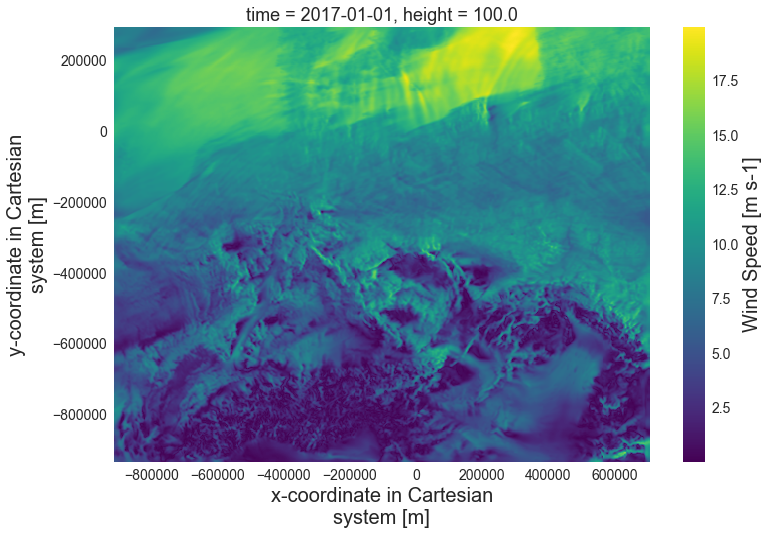

In [17]:
ncfile='//smb.uni-oldenburg.de/hpc_data/thesis/data/ncfiles\\P-CE-2017-2017-01-01.nc'
dom="CE"
ds=xr.open_dataset(ncfile)
if dom=="CE":
    ds=ds.isel(south_north=slice(2,412))
else:
    ds=ds.isel(west_east=slice(3,393))
ds=ds.isel(height=2,time=0)
LR=ds.WS.coarsen(south_north=10,west_east=10).mean()
grid={}#init
grid["sn_lr"]=LR.south_north.values
grid["we_lr"]=LR.west_east.values
grid["sn"]=ds.south_north.values
grid["we"]=ds.west_east.values

grid_CE=grid

ds.WS.plot()
xticks,_=plt.xticks()
yticks,_=plt.yticks()

CE_y=grid_CE["sn"]
CE_x=grid_CE["we"]

xticks_loc_CE=get_tick_loc(xticks[1:-1],CE_x)
yticks_loc_CE=get_tick_loc(yticks[1:-1],CE_y)
plot_yticks_CE=[int(tick/1e3) for tick in yticks[1:-1]]
plot_xticks_CE=[int(tick/1e3) for tick in xticks[1:-1]]
ds.close()

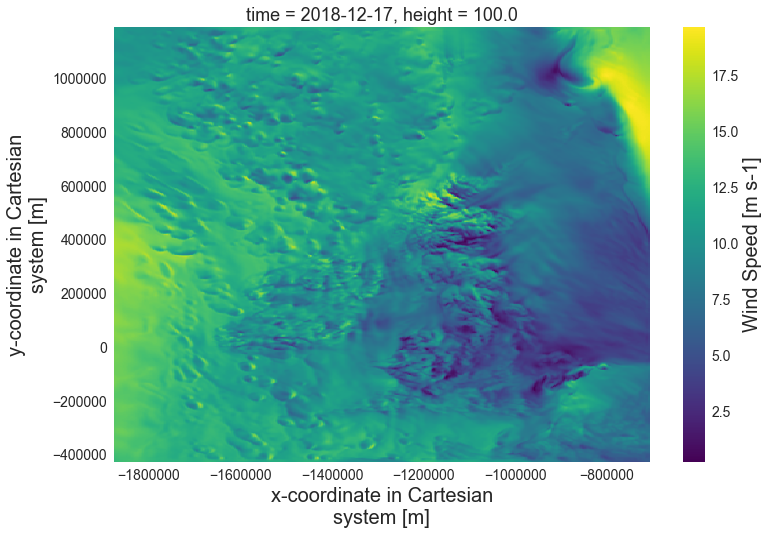

In [18]:
ncfile='//smb.uni-oldenburg.de/hpc_data/NEWA_nc\\P-GB-2018-2018-12-17.nc'
dom="GB"
ds=xr.open_dataset(ncfile)
if dom=="CE":
    ds=ds.isel(south_north=slice(2,412))
else:
    ds=ds.isel(west_east=slice(3,393))
ds=ds.isel(height=2,time=0)
LR=ds.WS.coarsen(south_north=10,west_east=10).mean()
grid={}#init
grid["sn_lr"]=LR.south_north.values
grid["we_lr"]=LR.west_east.values
grid["sn"]=ds.south_north.values
grid["we"]=ds.west_east.values

grid_GB=grid

ds.WS.plot()
xticks,_=plt.xticks()
yticks,_=plt.yticks()

GB_y=grid_GB["sn"]
GB_x=grid_GB["we"]

xticks_loc_GB=get_tick_loc(xticks[1:-1],GB_x)
yticks_loc_GB=get_tick_loc(yticks[1:-1],GB_y)
plot_yticks_GB=[int(tick/1e3) for tick in yticks[1:-1]]
plot_xticks_GB=[int(tick/1e3) for tick in xticks[1:-1]]

ds.close()

In [19]:
def plot_SR_HR_data(d, path,keys=None,size=[10,6],
                    xticks_loc=[],plot_xticks=[],
                    yticks_loc=[],plot_yticks=[],
                   vari=0):
    if keys is None:
        keys=list(d.keys())

    HR=d["Target"]
    try:
        keys.remove('Target')
    except:
        print("No HR")
        

    Ncol=len(keys)+1
    for i in range(HR.shape[0]):
        #plt.figure(figsize=(16, 8))
        fig, ax = plt.subplots(2, Ncol,figsize=size,gridspec_kw = {'wspace':0.05, 'hspace':0.05, "top":0.95,"bottom":0.02})
        #plotting limits based on HR data
        if vari:
            vmin0, vmax0 = np.min(d[keys[0]][i, :, :, 0]), np.max(d[keys[0]][i, :, :, 0])
            vmin1, vmax1 = np.min(d[keys[0]][i, :, :, 0]), np.max(d[keys[0]][i, :, :, 0])
        else:
            vmin0, vmax0 = np.min(HR[i,:,:,0]), np.max(HR[i,:,:,0])
            vmin1, vmax1 = np.min(HR[i,:,:,1]), np.max(HR[i,:,:,1])


        # LR leftmost plot
        ax_=ax[0,0]
        ax_.imshow(HR[i, :, :, 0], vmin=np.min(HR[i,:,:,0]), vmax=np.max(HR[i,:,:,0]), cmap='viridis', origin='lower')
        ax_.set_title('Ground truth')
        ax_.set_ylabel('u')
        ax_.set_xticks([])
        #ax_.set_yticks([])
        #plt.tight_layout()
        ax_.set_yticks(yticks_loc)
        ax_.set_yticklabels(plot_yticks)
        ax_.grid()


        ax_=ax[1,0]
        ax_.imshow(HR[i, :, :, 1], vmin=np.min(HR[i,:,:,1]), vmax=np.max(HR[i,:,:,1]), cmap='viridis', origin='lower')
        #plt.colorbar()
        ax_.set_ylabel('v')
        #ax_.set_xticks([])
        #ax_.set_yticks([])
        #plt.tight_layout()
        ax_.set_yticks(yticks_loc)
        ax_.set_yticklabels(plot_yticks)
        ax_.set_xticks(xticks_loc)
        ax_.set_xticklabels(plot_xticks)
        ax_.grid()

        # loop through comparison models
        for j,key in enumerate(keys):
            SR=d[key]

            ax_=ax[0,j+1]
            im0=ax_.imshow(SR[i, :, :, 0], vmin=vmin0, vmax=vmax0, cmap='viridis', origin='lower')
            ax_.set_title(key)
            #plt.colorbar()
            ax_.set_xticks([])
            ax_.set_yticks([])
            #plt.tight_layout()

            ax_=ax[1,j+1]
            im1=ax_.imshow(SR[i, :, :, 1], vmin=vmin1, vmax=vmax1, cmap='viridis', origin='lower')
            #plt.colorbar()
            #ax_.set_xticks([])
            ax_.set_xticks(xticks_loc)
            ax_.set_xticklabels(plot_xticks)
            ax_.grid()
            ax_.set_yticks([])
            #plt.tight_layout()
        #plt.tight_layout()
        #fig.tight_layout()
        #fig.subplots_adjust(right=0.8)
        fig.subplots_adjust(right=0.95)
        cbar_ax0 = fig.add_axes([0.96, 0.52, 0.03, 0.4])
        cbar=fig.colorbar(im0, cax=cbar_ax0)
        cbar.set_label("m/s") 
        cbar_ax1 = fig.add_axes([0.96, 0.05, 0.03, 0.4])
        cbar=fig.colorbar(im1, cax=cbar_ax1)
        cbar.set_label("m/s") 
        plt.savefig(path+'_ensemble_{0:05d}.png'.format(i), dpi=200, bbox_inches='tight')
        plt.savefig(path+'_ensemble_{0:05d}.eps'.format(i), format='eps', bbox_inches='tight')
        plt.close()

In [20]:
def plot_SR_HR_data_vert(d, path,keys=None,size=[10,6],
                         xticks_loc=[],plot_xticks=[],
                         yticks_loc=[],plot_yticks=[]):
    if keys is None:
        keys=list(d.keys())

    HR=d["Target"]
    try:
        keys.remove('Target')
    except:
        print("No HR")
        

    Nrow=len(keys)+1
    for i in range(HR.shape[0]):
        #plt.figure(figsize=(16, 8))
        fig, ax = plt.subplots(Nrow, 2,figsize=size,gridspec_kw = {'wspace':0.05, 'hspace':0.05, "top":0.99,"bottom":0.05})
        #plotting limits based on HR data
        vmin0, vmax0 = np.min(HR[i,:,:,0]), np.max(HR[i,:,:,0])
        vmin1, vmax1 = np.min(HR[i,:,:,1]), np.max(HR[i,:,:,1])

        # HR bottom plot
        ax_=ax[-1,0]
        ax_.imshow(HR[i, :, :, 0], vmin=vmin0, vmax=vmax0, cmap='viridis', origin='lower')
        ax_.set_ylabel('Ground truth')
        #ax_.set_title('u')
        #plt.colorbar()
        #ax_.set_xticks([])
        ax_.set_yticks(yticks_loc)
        ax_.set_yticklabels(plot_yticks)
        ax_.set_xticks(xticks_loc)
        ax_.set_xticklabels(plot_xticks)
        ax_.grid()

        #plt.tight_layout()

        ax_=ax[-1,1]
        ax_.imshow(HR[i, :, :, 1], vmin=vmin1, vmax=vmax1, cmap='viridis', origin='lower')
        #ax_.set_title('v')
        #plt.colorbar()
        #ax_.set_xticks([])
        ax_.set_yticks([])
        #plt.tight_layout()
        ax_.set_xticks(xticks_loc)
        ax_.set_xticklabels(plot_xticks)
        ax_.grid()

        # LR top plot
        ax_=ax[0,0]
        print(keys[0])
        ax_.imshow(d[keys[0]][i, :, :, 0], vmin=vmin0, vmax=vmax0, cmap='viridis', origin='lower')
        ax_.set_ylabel(keys[0])
        ax_.set_xticks([])
        #ax_.set_yticks([])
        ax_.set_yticks(yticks_loc)
        ax_.set_yticklabels(plot_yticks)
        ax_.grid()
        #plt.tight_layout()


        ax_=ax[0,1]
        ax_.imshow(d[keys[0]][i, :, :, 1], vmin=vmin1, vmax=vmax1, cmap='viridis', origin='lower')
        #plt.colorbar()
        ax_.set_xticks([])
        ax_.set_yticks([])
        #plt.tight_layout()

        # loop through comparison models
        for j,key in enumerate(keys[1:]):
            SR=d[key]

            ax_=ax[j+1,0]
            im0=ax_.imshow(SR[i, :, :, 0], vmin=vmin0, vmax=vmax0, cmap='viridis', origin='lower')
            ax_.set_ylabel(key)
            #plt.colorbar()
            ax_.set_xticks([])
            #ax_.set_yticks([])
            #plt.tight_layout()
            ax_.set_yticks(yticks_loc)
            ax_.set_yticklabels(plot_yticks)
            ax_.grid()

            ax_=ax[j+1,1]
            im1=ax_.imshow(SR[i, :, :, 1], vmin=vmin1, vmax=vmax1, cmap='viridis', origin='lower')
            #plt.colorbar()
            ax_.set_xticks([])
            ax_.set_yticks([])
            #plt.tight_layout()
        #plt.tight_layout()
        #fig.tight_layout()
        #fig.subplots_adjust(right=0.8)
        fig.subplots_adjust(bottom=0.05)
        cbar_ax0 = fig.add_axes([0.14, 0, 0.35, 0.02])
        cbar=fig.colorbar(im0, cax=cbar_ax0,orientation="horizontal")
        cbar.set_label("u [m/s]") 
        cbar_ax1 = fig.add_axes([0.54, 0, 0.35, 0.02])
        cbar=fig.colorbar(im1, cax=cbar_ax1,orientation="horizontal")
        cbar.set_label("v [m/s]") 
        plt.savefig(path+'ensemble_VERT_{0:05d}.png'.format(i), dpi=200, bbox_inches='tight')
        plt.savefig(path+'ensemble_VERT_{0:05d}.eps'.format(i), format='eps', bbox_inches='tight')
        plt.close()

In [21]:
# GB_plotdat={"WGAN":data2_GB,
#   "SWGAN":mean2_GB,
#     "WGAN-HR":data_GB,
#   "SWGAN-HR ":mean_GB,
#   "Target":target_GB}

CE_plotdat={"WGAN":data2_CE,
  "SWGAN":mean2_CE,
    "WGAN-HR":data_CE,
  "SWGAN-HR ":mean_CE,
  "Target":target_CE}

In [22]:
plot_SR_HR_data_vert(CE_plotdat,"imgs/CE",size=[6,10],
                     xticks_loc=xticks_loc_CE[1::2],plot_xticks=plot_xticks_CE[1::2],
                     yticks_loc=yticks_loc_CE,plot_yticks=plot_yticks_CE)

WGAN
WGAN
WGAN
WGAN
WGAN
WGAN
WGAN
WGAN


In [194]:
plot_SR_HR_data(CE_plotdat,"imgs/CE",size=[16,4],
                xticks_loc=xticks_loc_CE[1::3],plot_xticks=plot_xticks_CE[1::3],
                yticks_loc=yticks_loc_CE[1::2],plot_yticks=plot_yticks_CE[1::2])

In [168]:
plot_SR_HR_data(GB_plotdat,"imgs/GB",size=[9,4],
                xticks_loc=xticks_loc_GB[1::3],plot_xticks=plot_xticks_GB[1::3],
                yticks_loc=yticks_loc_GB[1::2],plot_yticks=plot_yticks_GB[1::2])

In [189]:
GB_plotdat={"SWGAN":np.sqrt(var2_GB),
  "SWGAN-HR ":np.sqrt(var_GB),
  "Target":target_GB}
plot_SR_HR_data(GB_plotdat,"imgs/GB_var",size=[9,7],
                xticks_loc=xticks_loc_GB[1::3],plot_xticks=plot_xticks_GB[1::3],
                yticks_loc=yticks_loc_GB[1::2],plot_yticks=plot_yticks_GB[1::2],vari=1)

In [185]:
CE_plotdat={"SWGAN":np.sqrt(var2_CE),
  "SWGAN-HR ":np.sqrt(var_CE),
  "Target":target_CE}
plot_SR_HR_data(CE_plotdat,"imgs/CE_var",size=[9,4],
                xticks_loc=xticks_loc_CE[1::2],plot_xticks=plot_xticks_CE[1::2],
                yticks_loc=yticks_loc_CE[1::2],plot_yticks=plot_yticks_CE[1::2],vari=1)